## 蜡烛图形态
**用TA_Lib寻找蜡烛图特征**

## 目录
1. 蜡烛图是什么？
2. 蜡烛图的两大用途是什么？
3. 6个常见蜡烛图是怎么计算的？
4. 蜡烛图如何用图表显示
5. 如何用TA_Lib寻找蜡烛图
6. 多根蜡烛图组合（最常用的5种）

### 1、 蜡烛图是什么？
蜡烛图又称为K线图，主要包含四个数据，即开盘价、最高价、最低价、收盘价，所有的蜡烛图都是围绕这四个数据展开，反映大势的状况和价格信息。如果把每日的K线图放在一张图中，就能得到日K线图，同样也可画出周K线图、月K线图。

### 2、 蜡烛图的两大用途是什么？
1. 判断反转信号
2. 判断持续信号

### 3、 常见蜡烛图是怎么计算的？
---
**1. 大阳线: 涨幅大于5%，上下影线小于1.8%**

$Close/Open>1.05$

$High/Low < Close/Open+0.018$

---

**2. 大阴线： 跌幅大于5%， 上下影线小于1.8%**

$Open/Close > 1.05$

$High/Low < Open/Close+0.018$

---

**3.下影线**

$(Min(Close,Open)-Low)/(High-Low)>0.667$

---

**4. 上影线**

$(High-Max(Close,Open))/(High-Low)>0.667$

---

**5.十字星**

$Close-Open<Abs(0.001)$

$High-Low>0.001$

**6. 缺口Gap**

$open[-1]-close[-2]>0.01$

## http://www.stockstowatch.com/candle-indicator/

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [34]:
import talib as ta
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

stock1 = pd.read_excel('sz50.xlsx', sheetname='600036.XSHG', index_col='datetime')[-200:]

### 4、 蜡烛图如何用图表显示

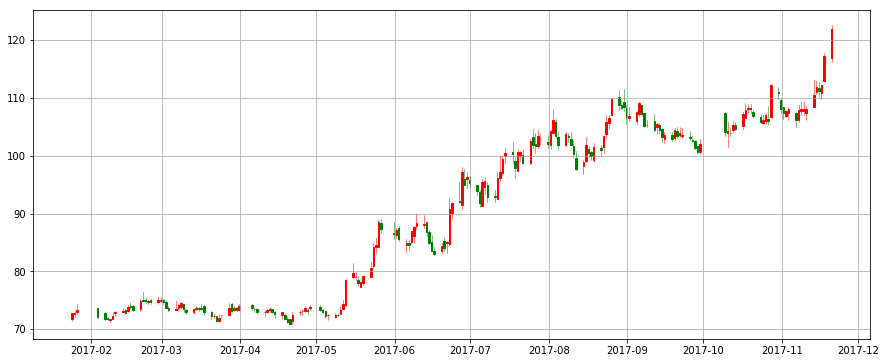

In [35]:
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num

stock1['time'] = list(map(date2num, stock1.index))
candle = stock1.reindex_axis(["time", "open", "high", "low", "close"], 1).values

import matplotlib.finance as mpf

fig, (ax) = plt.subplots(1,1, figsize=(15,12))
fig.subplots_adjust(bottom=0.5)
ax.grid(True)
mpf.candlestick_ohlc(ax, candle, width=0.6, colorup='r', colordown='g',alpha=1.0)
ax.xaxis_date ()
plt.show()

### 5、 如何用TA_Lib寻找蜡烛图

In [36]:
CDLLONGLINE = ta.abstract.CDLLONGLINE(stock1)

In [37]:
axisX = CDLLONGLINE[CDLLONGLINE==100].index
axisY = stock1.loc[axisX].low-0.1

In [38]:
def draw_candle(candle, scatterX, scatterY):
    fig, (ax) = plt.subplots(1,1,sharex=True, figsize=(16,7))
    ax.grid(True)
    mpf.candlestick_ohlc(ax, candle, width=0.6, colorup='r', colordown='g',alpha=1.0)
    ax.scatter(scatterX, scatterY, color='b', s=100, marker='^')
    ax.xaxis_date ()
    plt.show()

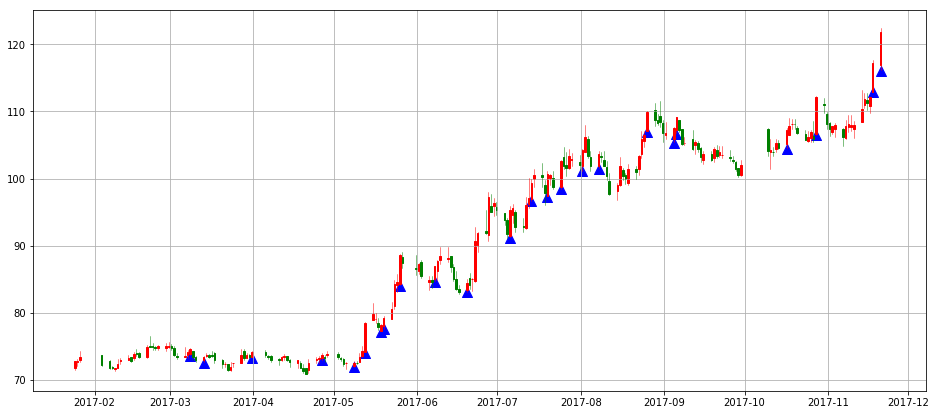

In [39]:
draw_candle(candle, axisX, axisY)

### 6、 多根蜡烛图组合
1. Engulfing, bearish: 79% ta.CDLENGULFING
2. Morning star: 78% ta.CDLMORNINGSTAR

In [48]:
CDLENGULFING = ta.abstract.CDLENGULFING(stock1)

In [55]:
CDLENGULFING_X = CDLENGULFING[CDLENGULFING==100].index
CDLENGULFING_Y = stock1.loc[CDLENGULFING_X].low-1

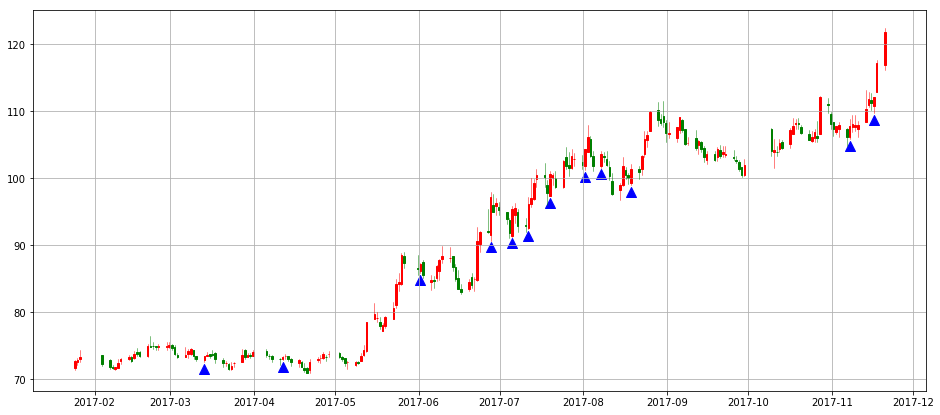

In [56]:
draw_candle(candle, CDLENGULFING_X, CDLENGULFING_Y)

In [58]:
CDLMORNINGSTAR = ta.abstract.CDLMORNINGSTAR(stock1)
CDLMORNINGSTAR_X = CDLMORNINGSTAR[CDLMORNINGSTAR==100].index
CDLMORNINGSTAR_Y = stock1.loc[CDLMORNINGSTAR_X].low-1

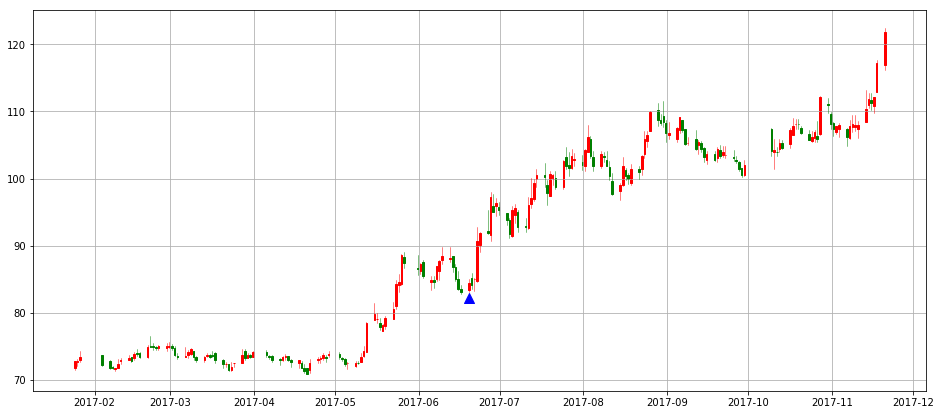

In [61]:
draw_candle(candle, CDLMORNINGSTAR_X, CDLMORNINGSTAR_Y)